In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [0]:
cifar10 = tf.keras.datasets.cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [31]:
x_train = x_train /255.0
x_test = x_test/255.0
y_train = y_train.flatten()
y_test = y_test.flatten()
x_train.shape

(50000, 32, 32, 3)

In [32]:
y_train.shape

(50000,)

In [33]:
K = len(set(y_train))
print('No. of Classes:' , K)

No. of Classes: 10


In [0]:
# Build Model using Functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
#x = Dropout(0.2)(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
#x = Dropout(0.2)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)
#x = Dropout(0.2)

#x = GlobalMaxPooling2D(2,2)(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x= Dense(1024, activation='relu')(x)
x= Dropout(0.2)(x)
x=Dense(K,activation = 'softmax')(x)

model = Model(i,x)

In [0]:
model.compile(optimizer='adam',
             loss= 'sparse_categorical_crossentropy',
             metrics= ['accuracy'])
#r = model.fit(x_train, y_train, validation_data =(x_test,y_test),epochs=15)

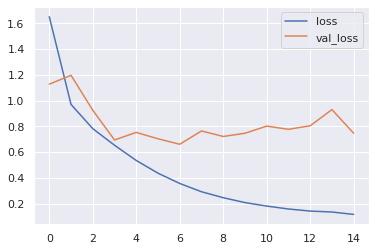

In [9]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

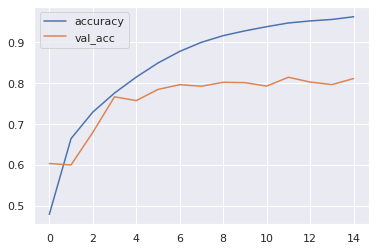

In [10]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

Confusion matrix without normalization
[[875  10  44  11   5   2   9   6  28  10]
 [ 14 919   0   2   2   2   6   1  20  34]
 [ 62   3 744  22  43  40  57  21   4   4]
 [ 20   4  75 602  34 164  62  27   7   5]
 [ 18   4  60  53 717  49  46  47   3   3]
 [ 11   3  37 110  20 769  20  24   4   2]
 [  6   3  39  28  13  19 881   6   5   0]
 [ 19   1  22  18  28  44   7 856   2   3]
 [ 67  14   6   3   4   1   5   2 886  12]
 [ 30  57   5   5   1   3   6   8  19 866]]


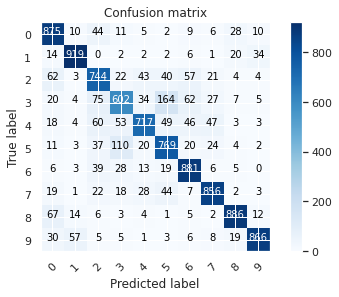

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation= 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = '2f' if normalize else 'd'
    thresh =cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j],fmt),
                 horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
labels= '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: deer Predicted: horse')

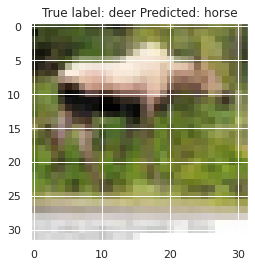

In [13]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]))

In [36]:
batch_size =32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range = 0.1,horizontal_flip=True)
train_generator = data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test,y_test), steps_per_epoch=steps_per_epoch, epochs=15) #more epochs for next run

Epoch 1/15
1562/1562 [==============================] - 33s 21ms/step - loss: 1.5961 - accuracy: 0.4678 - val_loss: 1.1654 - val_accuracy: 0.6047
Epoch 2/15
1562/1562 [==============================] - 32s 21ms/step - loss: 1.0763 - accuracy: 0.6265 - val_loss: 0.9090 - val_accuracy: 0.6927
Epoch 3/15
1562/1562 [==============================] - 32s 21ms/step - loss: 0.9218 - accuracy: 0.6811 - val_loss: 1.0155 - val_accuracy: 0.6577
Epoch 4/15
1562/1562 [==============================] - 32s 21ms/step - loss: 0.8188 - accuracy: 0.7200 - val_loss: 0.8999 - val_accuracy: 0.7149
Epoch 5/15
1562/1562 [==============================] - 32s 21ms/step - loss: 0.7405 - accuracy: 0.7480 - val_loss: 0.7277 - val_accuracy: 0.7662
Epoch 6/15
1562/1562 [==============================] - 32s 21ms/step - loss: 0.6998 - accuracy: 0.7630 - val_loss: 0.6959 - val_accuracy: 0.7655
Epoch 7/15
1562/1562 [==============================] - 33s 21ms/step - loss: 0.6463 - accuracy: 0.7814 - val_loss: 0.6787 -

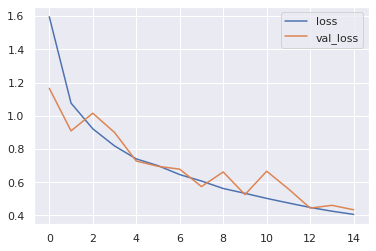

In [37]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

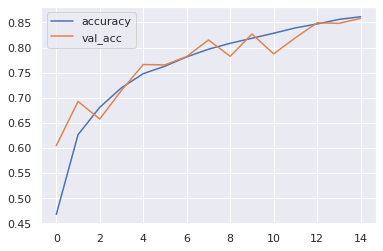

In [38]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

Confusion matrix without normalization
[[855  11  43  15  11   2   7   8  34  14]
 [  4 976   1   2   1   1   1   0   3  11]
 [ 34   1 816  36  39  18  33  16   6   1]
 [ 11   3  46 762  42  74  42   8   3   9]
 [  9   2  40  27 871  12  25  11   3   0]
 [  4   2  32 145  30 744  13  25   4   1]
 [  4   2  34  36  14   4 899   2   4   1]
 [  5   1  14  32  43  15   7 879   2   2]
 [ 41  22  10  10   0   3   3   1 897  13]
 [  9  82   3   7   4   3   2   1   7 882]]


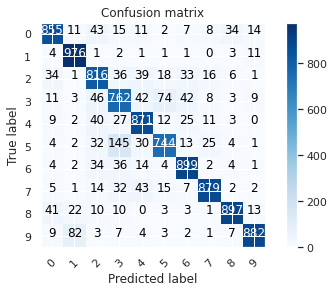

In [39]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix without normalization')
    
    print(cm)
    
    plt.imshow(cm, interpolation= 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt = '2f' if normalize else 'd'
    thresh =cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j],fmt),
                 horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


Text(0.5, 1.0, 'True label: airplane Predicted: automobile')

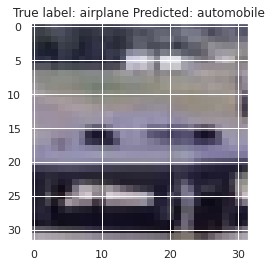

In [41]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]))

In [42]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 64)        256 